# Erro empírico e generalização

Este *notebook* contém o código que fizemos durante a aula de 26/mar e também o código utilizado para gerar as figuras e tabelas dos slides do Tópico&nbsp;3.

- [Código da aula](#Código-da-aula)
  - [Conjunto de treinamento](#Conjunto-de-treinamento)
  - [Regressão com M=1](#Regressão-com-M=1)
  - [Regressor polinomial](#Regressor-polinomial)
- [Código para as figuras dos slides](#Código-para-as-figuras-dos-slides)
  - [Conjunto de treinamento](#Conjunto-de-treinamento)
  - [Underfitting e overfitting](#Underfitting-e-overfitting)
  - [Ruído](#Ruído)
  - [Erro empírico](#Erro-empírico)
  - [Regularização](#Regularização)


# Código da aula

## Conjunto de treinamento

Geramos um pequeno conjunto com 10 pontos no intervalo $[0,1]$. Os pontos seguem a estrutura geral $\sin(2\pi{}x)$ e são acrescidos de um ruído representado por uma variável aleatória com distribuição gaussiana $X\sim\mathcal{N}(0, 0{.}25)$.

Nossos exemplos possuem um único atributo, $x_i=\frac{i - 1}{9}$ ($x_1=0$, $x_2=0{,}111$, $x_3=0{,}222$, ...)

In [1]:
import numpy as np
X = np.linspace(0, 1, 10)
X

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

Para garantir reproducibilidade, instanciamos primeiro um gerador de números pseudaleatórios com um valor fixo de semente. Isso significa que a sequência de valores que vamos extrair será sempre a mesma.

In [2]:
rng = np.random.RandomState(42)

y = np.sin(2 * X * np.pi) + rng.normal(loc=0, scale=.25, size=10)
y

array([ 0.12417854,  0.60822153,  1.14672989,  1.24678287,  0.2834818 ,
       -0.40055438, -0.4712222 , -0.79294907, -0.76015621,  0.13564001])

Podemos plotar esses pontos.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

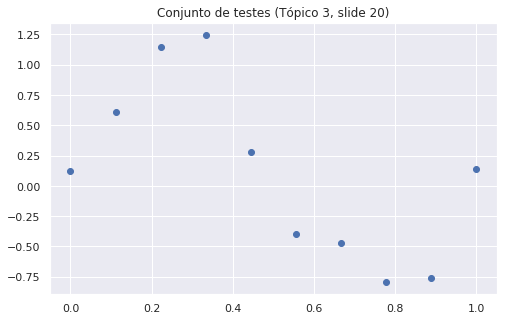

In [4]:
plt.figure(figsize=(8,5));
plt.plot(X, y, 'o');
plt.title('Conjunto de testes (Tópico 3, slide 20)');

## Regressão com M=1

Vamos gerar um modelo de regressão linear com $M=1$.

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
m1 = LinearRegression(fit_intercept=False)
m1.fit(X[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

Podemos inspecionar os coeficientes desse modelo:

In [7]:
m1.coef_

array([-0.23574572])

In [8]:
m1.intercept_

0.0

Para visualizarmos esse modelo, podemos gerar uma amostra contendo 100 pontos no intervalo $[0,1]$.

In [9]:
Xmodel = np.linspace(0, 1, 100)
Ymodel = m1.predict(Xmodel[:,np.newaxis])

Se superimpusermos os exemplos de treinamento com as predições para `Xmodel`, veremos qual foi o espaço de predição que aprendemos:

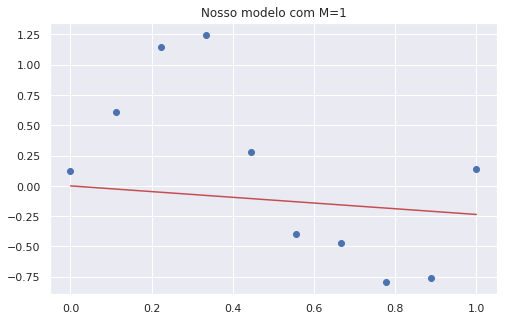

In [10]:
plt.figure(figsize=(8,5));
plt.plot(Xmodel, Ymodel, 'r');
plt.plot(X, y, 'o');
plt.title('Nosso modelo com M=1');

Note que a curva intercepta o eixo das abcissas em $y=0$. Isso ocorre porque especificamos `fit_intercept=False`, portanto o modelo não aprendeu qual é o melhor valor para interceptar esses elementos.

Se refizermos o modelo com `fit_intercept=True`, teremos um modelo diferente:

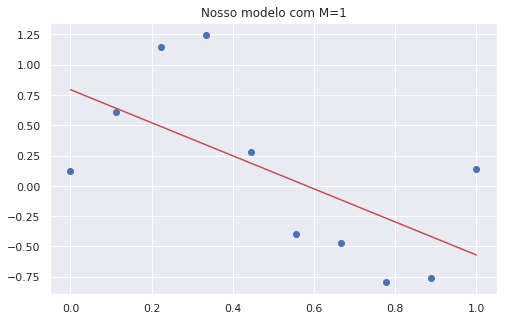

In [11]:
m1 = LinearRegression(fit_intercept=True)
m1.fit(X[:, np.newaxis], y)

Xmodel = np.linspace(0, 1, 100)
Ymodel = m1.predict(Xmodel[:,np.newaxis])

plt.figure(figsize=(8,5));
plt.plot(Xmodel, Ymodel, 'r');
plt.plot(X, y, 'o');
plt.title('Nosso modelo com M=1');

## Regressor polinomial

No regressor polinomial, podemos especificar a complexidade do modelo alterando o valor de $M$. Note que, embora o regressor polinomial não seja linear em termos de $x$, ele é linear em termos de $w$. Portanto regressores polinomiais são modelos da família de regressores lineares.

No Scikit-Learn, podemos gerar um regressor polinomial com o modelo `LinearRegression`, simplesmente pré-processando os exemplos com `PolynomialFeatures`.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

Vamos fazer um modelo de regressão linear com $M=3$. Portanto, precisamos de um pré-processador de atributos polinomiais com grau 3.

In [13]:
poli3 = PolynomialFeatures(degree=3)

Para treinar esse modelo, repetimos o procedimento anterior, mas agora os exemplos são pré-processados com `poli3`.

In [14]:
m3 = LinearRegression(fit_intercept=True)
m3.fit(poli3.fit_transform(X[:, np.newaxis]), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Podemos inspecionar os coeficientes aprendidos:

In [15]:
m3.coef_

array([  0.        ,  10.93746246, -31.94187142,  21.09880425])

In [16]:
m3.intercept_

0.021311702329546378

E podemos ver como esse regressor se comporta para um número maior de pontos no intervalo $[0,1]$ para visualizar o modelo:

In [17]:
Ymodel = m3.predict(poli3.fit_transform(Xmodel[:, np.newaxis]))

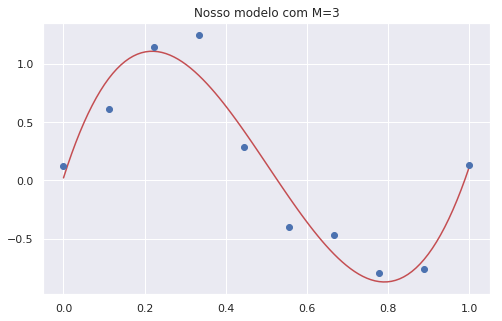

In [18]:
plt.figure(figsize=(8,5));
plt.plot(Xmodel, Ymodel, 'r');
plt.plot(X, y, 'o');
plt.title('Nosso modelo com M=3');

# Código para as figuras dos slides

## Conjunto de treinamento

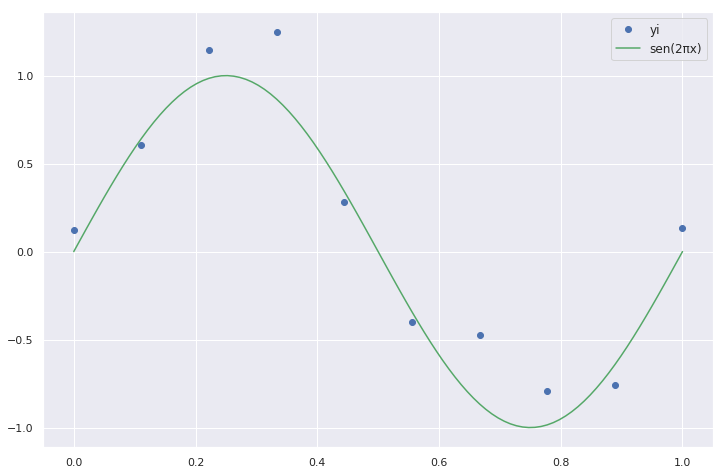

In [26]:
rng = np.random.RandomState(42)

X = np.linspace(0, 1, 10)
y = np.sin(X * 2 * np.pi) + rng.normal(loc=0, scale=.25, size=10)

Xpred = np.linspace(0, 1, 100)
ytrue = np.sin(Xpred * 2 * np.pi)

plt.figure(figsize=(12,8));
plt.plot(X, y, 'o', label='yi');
plt.plot(Xpred, ytrue, 'g', label='sen(2πx)'); 
plt.legend(prop={'size':12});

del rng, X, y, Xpred, ytrue

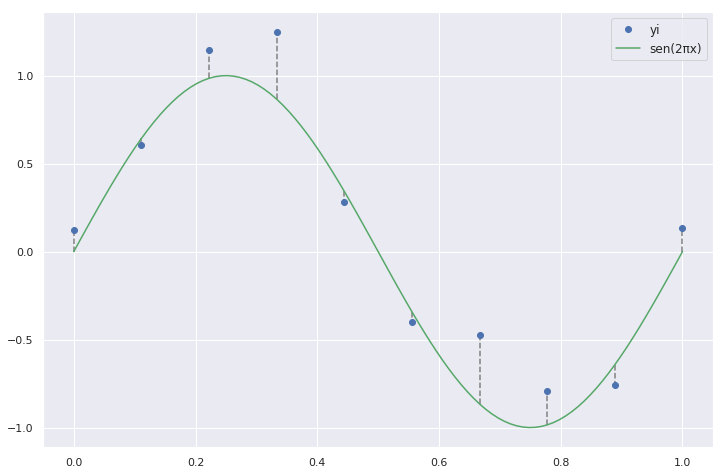

In [30]:
rng = np.random.RandomState(42)

X = np.linspace(0, 1, 10)
y = np.sin(X * 2 * np.pi) + rng.normal(loc=0, scale=.25, size=10)

Xpred = np.linspace(0, 1, 100)
ytrue = np.sin(Xpred * 2 * np.pi)

plt.figure(figsize=(12,8));
for i in range(10):
    plt.plot([X[i], X[i]], [np.sin(2*np.pi*X[i]), y[i]], '--', c='gray');
plt.plot(X, y, 'o', label='yi');
plt.plot(Xpred, ytrue, 'g', label='sen(2πx)'); 
plt.legend(prop={'size':12});

del rng, X, y, Xpred, ytrue

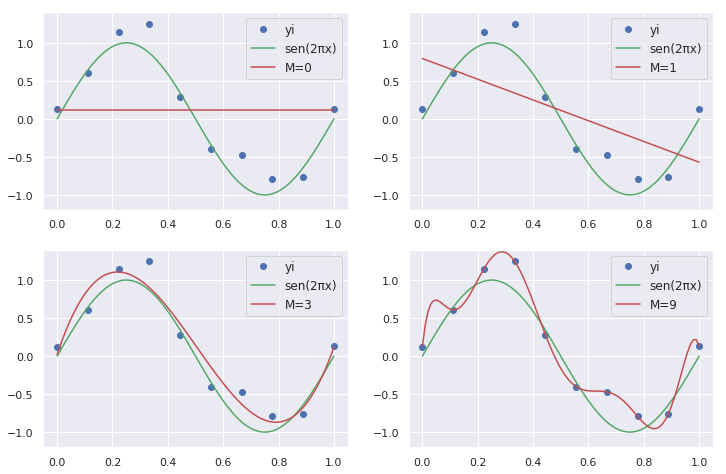

In [19]:
rng = np.random.RandomState(42)

X = np.linspace(0, 1, 10)
y = np.sin(X * 2 * np.pi) + rng.normal(loc=0, scale=.25, size=10)

Xpred = np.linspace(0, 1, 100)
ytrue = np.sin(Xpred * 2 * np.pi)

p = 1

plt.figure(figsize=(12,8))
for d in [0, 1, 3, 9]:
    poli = PolynomialFeatures(degree=d)
    m = LinearRegression(fit_intercept=True)
    m.fit(poli.fit_transform(X[:, np.newaxis]), y)

    yfit = m.predict(poli.fit_transform(Xpred[:, np.newaxis]))
    
    plt.subplot(2, 2, p);
    p = p + 1
    
    plt.plot(X, y, 'o', label='yi');
    plt.plot(Xpred, ytrue, 'g', label='sen(2πx)'); 
    plt.plot(Xpred, yfit, 'r', label=f'M={d}');

    plt.ylim(-1.2, 1.4);
    plt.legend(prop={'size':12});
    
del rng, X, y, Xpred, ytrue, p

## Underfitting e overfitting

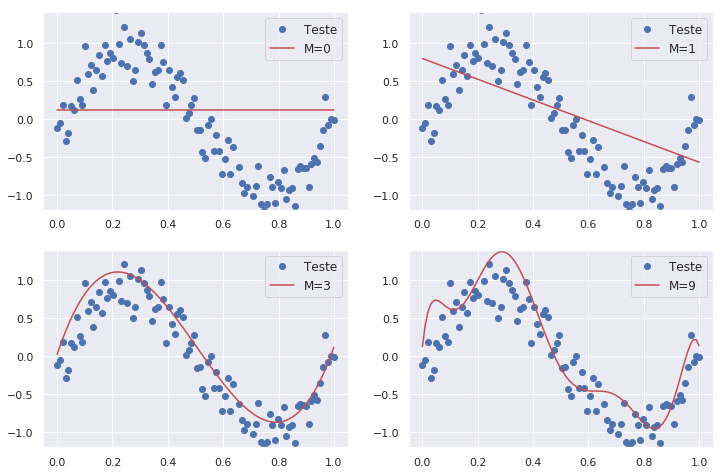

In [33]:
rng = np.random.RandomState(42)

X = np.linspace(0, 1, 10)
y = np.sin(X * 2 * np.pi) + rng.normal(loc=0, scale=.25, size=10)

Xpred = np.linspace(0, 1, 100)
ytrue = np.sin(Xpred * 2 * np.pi) + rng.normal(loc=0, scale=.25, size=100)

p = 1

plt.figure(figsize=(12,8))
for d in [0, 1, 3, 9]:
    poli = PolynomialFeatures(degree=d)
    m = LinearRegression(fit_intercept=True)
    m.fit(poli.fit_transform(X[:, np.newaxis]), y)

    yfit = m.predict(poli.fit_transform(Xpred[:, np.newaxis]))
    
    plt.subplot(2, 2, p);
    p = p + 1
    
    plt.plot(Xpred, ytrue, 'o', label='Teste'); 
    plt.plot(Xpred, yfit, 'r', label=f'M={d}');

    plt.ylim(-1.2, 1.4);
    plt.legend(prop={'size':12});
    
del rng, X, y, Xpred, ytrue, p

In [35]:
from sklearn.metrics import mean_squared_error

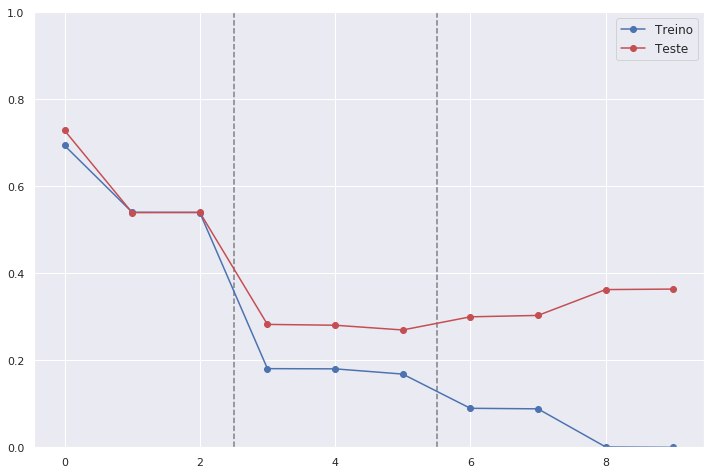

In [48]:
rng = np.random.RandomState(42)

X = np.linspace(0, 1, 10)
y = np.sin(X * 2 * np.pi) + rng.normal(loc=0, scale=.25, size=10)

Xpred = np.linspace(0, 1, 100)
ytrue = np.sin(Xpred * 2 * np.pi) + rng.normal(loc=0, scale=.25, size=100)

erro_treino = list(range(10))
erro_teste = list(range(10))

for M in range(10):
    poli = PolynomialFeatures(degree=M)
    m = LinearRegression(fit_intercept=True)
    m.fit(poli.fit_transform(X[:, np.newaxis]), y)

    yfit = m.predict(poli.fit_transform(X[:, np.newaxis]))
    erro_treino[M] = math.sqrt(mean_squared_error(yfit, y))
    
    yfit = m.predict(poli.fit_transform(Xpred[:, np.newaxis]))
    erro_teste[M] = math.sqrt(mean_squared_error(yfit, ytrue))
    
plt.figure(figsize=(12,8))
plt.plot([2.5, 2.5], [0, 1], '--', c='gray');
plt.plot([5.5, 5.5], [0, 1], '--', c='gray');
plt.plot(erro_treino, 'o-', label='Treino');
plt.plot(erro_teste, 'ro-', label='Teste'); 

plt.ylim(0, 1);
plt.legend(prop={'size':12});
    
del rng, X, y, Xpred, ytrue

## Ruído

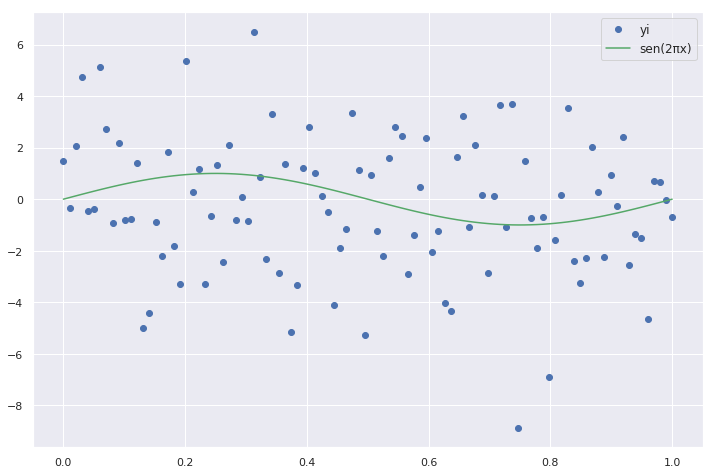

In [51]:
rng = np.random.RandomState(42)

X = np.linspace(0, 1, 100)
y = np.sin(X * 2 * np.pi) + rng.normal(loc=0, scale=3, size=100)

Xpred = np.linspace(0, 1, 100)
ytrue = np.sin(Xpred * 2 * np.pi)

plt.figure(figsize=(12,8));
plt.plot(X, y, 'o', label='yi');
plt.plot(Xpred, ytrue, 'g', label='sen(2πx)'); 
plt.legend(prop={'size':12});

del rng, X, y, Xpred, ytrue

## Erro empírico

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
import math

In [34]:
rng = np.random.RandomState(42)

X = np.linspace(0, 1, 10)
y = np.sin(X * 2 * np.pi) + rng.normal(loc=0, scale=.25, size=(10))

for M in range(0, 10):
    poli = PolynomialFeatures(degree=M)
    
    m = LinearRegression(fit_intercept=True)
    m.fit(poli.fit_transform(X[:, np.newaxis]), y)
    
    ypred = m.predict(poli.fit_transform(X[:, np.newaxis]))

    print("M = {} -> {:.4}".format(M, math.sqrt(mean_squared_error(y, ypred))))

M = 0 -> 0.6941
M = 1 -> 0.5405
M = 2 -> 0.5399
M = 3 -> 0.1809
M = 4 -> 0.1804
M = 5 -> 0.1684
M = 6 -> 0.08969
M = 7 -> 0.08844
M = 8 -> 0.0008924
M = 9 -> 3.451e-12


## Regularização

In [23]:
from sklearn.linear_model import Ridge

M = 9 -> 1.151
M = 9 -> 0.8993
M = 9 -> 1.316
M = 9 -> 1.73


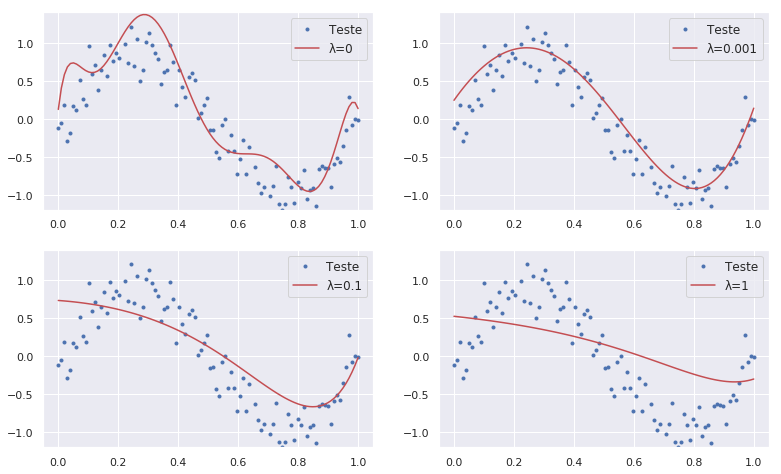

In [24]:
rng = np.random.RandomState(42)
X = np.linspace(0, 1, 10)
y = np.sin(X * 2 * np.pi) + rng.normal(loc=0, scale=.25, size=10)

Xpred = np.linspace(0, 1, 100)
ytrue = np.sin(Xpred * 2 * np.pi) + rng.normal(loc=0, scale=.25, size=100)

plt.figure(figsize=(13,8));

p = 1
for lbd in [0, 0.001, .1, 1]:
    poli = PolynomialFeatures(degree=M)
    m = Ridge(fit_intercept=True, alpha=lbd)
    m.fit(poli.fit_transform(X[:, np.newaxis]), y)
    ypred = m.predict(poli.fit_transform(Xpred[:, np.newaxis]))
    
    plt.subplot(2, 2, p);
    plt.plot(Xpred, ytrue, 'o', label='Teste', markersize=3);
    plt.plot(Xpred, ypred, 'r', label=f'λ={lbd}');

    plt.ylim(-1.2, 1.4);
    plt.legend(prop={'size':12});
    p = p + 1

    print("M = {} -> {:.4}".format(M, np.sqrt(np.sum((ypred - ytrue)**2/10))))